# Predator Analysis: COAD

## Evaluation on _CancerMine_



<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorAnalysis_COAD_CancerMine.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">Februrary 16th, 2022</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>

TBA

In [1]:
from IPython.display import display
from PredatorAnalysis import PredatorAnalysis

# Paths
## SNVs
SNV_COMMON_PATH = "C:/Users/ibrah/Desktop/SNV_data/SNV_datasets/"
SNV_COAD_PATH = SNV_COMMON_PATH + "SNV_COAD_hg38_2021-09-22.csv"

PREDICTION_ID = "9789393f/"
PREDICTIONS_COMMON_PATH = "../data/predictions_datasets/coad_prediction_2022-01-06/" + PREDICTION_ID
PREDICTION_COAD_REDUCED_PATH = PREDICTIONS_COMMON_PATH + "predictions_soft_2022-01-06.csv"

ELASPIC_RESULTS_COMMON_PATH = "../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/"  # elaspic_results_datasets
COAD_CORE_PATH = ELASPIC_RESULTS_COMMON_PATH + "COAD_Core_2022-01-06.txt"
COAD_INTERFACE_PATH = ELASPIC_RESULTS_COMMON_PATH + "COAD_Interface_2022-01-06.txt"

# Patient Interaction data
COAD_PATIENT_INTERACTION_DATA_PATH = "../data/patient_interaction_datasets/COAD_patient_interactions_analysis_table_2022-01-06.xlsx"

# CANCER MINE GENES
CANCER_MINE_ALL_PATH = "../data/cancer_mine_genes/all_genes_2021-10-26.txt"
CANCER_MINE_COLON_PATH = "../data/cancer_mine_genes/colon_genes_2022-02-16.txt"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

In [2]:
predator_analysis = PredatorAnalysis(
    tcga="coad",
    snv_path=SNV_COAD_PATH,
    prediction_data_path=PREDICTION_COAD_REDUCED_PATH,
    prediction_id=PREDICTION_ID,
    elaspic_core_path=COAD_CORE_PATH,
    elaspic_interface_path=COAD_INTERFACE_PATH,
    patient_interaction_data_path=COAD_PATIENT_INTERACTION_DATA_PATH,
    reference_data_name="cancermine",
    reference_data_spec_cohort_path=CANCER_MINE_COLON_PATH,
    reference_data_path=CANCER_MINE_ALL_PATH
)

2022-02-16 10:40:42 | INFO     | PredatorAnalysis |  - - Predator Analysis - - 
2022-02-16 10:40:42 | INFO     | PredatorAnalysis | TCGA: coad
2022-02-16 10:40:42 | INFO     | PredatorAnalysis | PREDICTION ID: 9789393f/
2022-02-16 10:40:42 | INFO     | helpers.helpers_analysis.loaders | Loading coad SNV datasets ..
2022-02-16 10:40:54 | DEBUG    | helpers.helpers_analysis.loaders | coad SNV data size: (264786, 121)
2022-02-16 10:40:55 | DEBUG    | helpers.helpers_analysis.loaders | coad SNV data processed size: (126470, 121)
2022-02-16 10:40:55 | INFO     | helpers.helpers_analysis.loaders | coad SNV datasets are loaded.
2022-02-16 10:40:55 | INFO     | helpers.helpers_analysis.loaders | Loading coad Prediction dataset ..
2022-02-16 10:40:55 | DEBUG    | helpers.helpers_analysis.loaders | coad Prediction data shape: (7517, 5)
2022-02-16 10:40:55 | INFO     | helpers.helpers_analysis.loaders | coad Prediction dataset is loaded.
2022-02-16 10:40:55 | INFO     | helpers.helpers_analysis.l

# Datasets

##  1. SNV Datasets

In [3]:
# Original SNV Dataset
print(predator_analysis.data_materials["coad_snv_data"].shape)

(264786, 121)


In [4]:
# Processed SNV Dataset
print(predator_analysis.data_materials["coad_snv_data_processed"].shape)

(126470, 121)


In [5]:
# Simplified SNV Dataset
print(predator_analysis.data_materials["coad_snv_data_simplified"].shape)
predator_analysis.data_materials["coad_snv_data_simplified"].head(3)

(126470, 4)


Hugo_Symbol SWISSPROT HGVSp_Short Tumor_Sample_Barcode
0        GNB1    P62873       S334I         TCGA-AA-3966
1      TAS1R1    Q7RTX1       V496M         TCGA-AA-3966
2      TAS1R2    Q8TE23       F779V         TCGA-AA-3966

## 2. ELASPIC Results Datasets

### 2.1. `Core` Datasets

In [6]:
# Core data 
print(predator_analysis.data_materials["coad_elaspic_core_data"].shape)
predator_analysis.data_materials["coad_elaspic_core_data"].head(3)

(39722, 103)


Input_identifier UniProt_ID Mutation Status  Type COSMIC_mut_ID  \
0           Q7RTX1     Q7RTX1    V496M   done  core    COSM273329   
1           Q8TE23     Q8TE23    F779V   done  core             -   
2           Q86UV5     Q86UV5    R458C   done  core    COSM273450   

  ClinVar_mut_ID UniProt_mut_ID Domain_name Domain_clan  ...  \
0              -              -       NCD3G       NCD3G  ...   
1              -              -       7tm_3       7tm_3  ...   
2              -              -         UCH         UCH  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                    8.0                      -                        -   
1                  241.0                      -                        -   
2                  384.0                      -                        -   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                       -                       -                          -   
1                       -                       -                          -   
2                       -                       -                          -   

  Interface_hydrophilic_area Interface_total_area  \
0                          -                    -   
1                          -                    -   
2                          -                    -   

  Interface_contact_distance_wt Interface_contact_distance_mut  
0                             -                              -  
1                             -                              -  
2                             -                              -  

[3 rows x 103 columns]

In [7]:
# Core data simplified
print(predator_analysis.data_materials["coad_elaspic_core_data_simplified"].shape)
predator_analysis.data_materials["coad_elaspic_core_data_simplified"].head(3)

(39424, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     Q7RTX1    V496M                     -
1     Q8TE23    F779V                     -
2     Q86UV5    R458C                     -

### 2.2 `Interface` Datasets

In [8]:
print(predator_analysis.data_materials["coad_elaspic_interface_data"].shape)
predator_analysis.data_materials["coad_elaspic_interface_data"].head(3)

(14664, 103)


Input_identifier UniProt_ID Mutation Status       Type COSMIC_mut_ID  \
0           P62873     P62873    S334I   done  interface             -   
1           Q9BXB4     Q9BXB4    N590D   done  interface    COSM273062   
2           Q9BXB4     Q9BXB4    N590D   done  interface    COSM273062   

  ClinVar_mut_ID UniProt_mut_ID   Domain_name     Domain_clan  ...  \
0              -              -          WD40  Beta_propeller  ...   
1              -              -  Oxysterol_BP    Oxysterol_BP  ...   
2              -              -  Oxysterol_BP    Oxysterol_BP  ...   

  number_of_residues_mut IntraclashesEnergy1_wt  IntraclashesEnergy1_mut  \
0                  567.0                128.711                  135.025   
1                  742.0                464.479                  464.478   
2                  742.0                464.479                  464.478   

   IntraclashesEnergy2_wt IntraclashesEnergy2_mut Interface_hydrophobic_area  \
0                 73.3808                 73.3852                     894.75   
1                199.2630                199.2630                    514.015   
2                199.2630                199.2630                    514.015   

  Interface_hydrophilic_area Interface_total_area  \
0                     661.58              1556.32   
1                     268.27              782.285   
2                     268.27              782.285   

  Interface_contact_distance_wt  Interface_contact_distance_mut  
0                       6.34896                         3.64695  
1                       5.08133                         3.32753  
2                       5.08133                         3.32753  

[3 rows x 103 columns]

In [9]:
print(predator_analysis.data_materials["coad_elaspic_interface_processed_data"].shape)
predator_analysis.data_materials["coad_elaspic_interface_processed_data"].head(3)

(7816, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     P62873    S334I                Q13371
1     Q9BXB4    N590D                Q96SU4
2     P35251    V921A                P35250

### 2.3. ELASPIC `Core` and `Interface` Combined

Combine two dataframes:
+ *coad_elaspic_core_data_simplified*
+ *coad_interface_processed*

In [10]:
print('ELASPIC CORE DATA')
display(predator_analysis.data_materials["coad_elaspic_core_data_simplified"].head(3))
print('Data dimensions:', predator_analysis.data_materials["coad_elaspic_core_data_simplified"].shape)

print('\nELASPIC INTERFACE DATA')
display(predator_analysis.data_materials["coad_elaspic_interface_processed_data"].head(3))
print('Data dimensions:', predator_analysis.data_materials["coad_elaspic_interface_processed_data"].shape)

ELASPIC CORE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     Q7RTX1    V496M                     -
1     Q8TE23    F779V                     -
2     Q86UV5    R458C                     -

Data dimensions: (39424, 3)

ELASPIC INTERFACE DATA


UniProt_ID Mutation Interactor_UniProt_ID
0     P62873    S334I                Q13371
1     Q9BXB4    N590D                Q96SU4
2     P35251    V921A                P35250

Data dimensions: (7816, 3)


In [11]:
# ELASPIC Core and Interface Combined
print(predator_analysis.data_materials["coad_elaspic_core_and_interface_data"].shape)
predator_analysis.data_materials["coad_elaspic_core_and_interface_data"].head(3)

(47240, 3)


UniProt_ID Mutation Interactor_UniProt_ID
0     Q7RTX1    V496M                     -
1     Q8TE23    F779V                     -
2     Q86UV5    R458C                     -

## 3. Prediction Datasets

**Note**: We decided to drop some entries due to invalid prediction case, thus interface data and prediction data are not the same.

In [12]:
print(predator_analysis.data_materials["coad_prediction_data"].shape)
predator_analysis.data_materials["coad_prediction_data"].head(3)

(7517, 5)


UniProt_ID Mutation Interactor_UniProt_ID  Prediction  Median_Probability
0     P62873    S334I                Q13371           0             0.48376
1     Q9BXB4    N590D                Q96SU4           1             0.64160
2     P35251    V921A                P35250           0             0.25170

## 4. CancerMine Genes

In [13]:
print(len(predator_analysis.data_materials['cancermine_coad_genes']))
predator_analysis.data_materials['cancermine_coad_genes'][:5]  # 29

105


['KRAS', 'APC', 'MYC', 'BRAF', 'EGFR']

In [14]:
print(len(predator_analysis.data_materials['cancermine_all_genes']))
predator_analysis.data_materials['cancermine_all_genes'][:5]  # 1024

1024


['ERBB2', 'ABL1', 'EGFR', 'KRAS', 'BRAF']

# Prepare Analysis

In [15]:
predator_analysis.prepare_analysis()

2022-02-16 10:41:01 | DEBUG    | PredatorAnalysis | coad_elaspic_proteins loaded.
2022-02-16 10:41:01 | DEBUG    | PredatorAnalysis | Number of proteins in ELASPIC coad: 10482


Retrieving Gene IDs from UniProt API .. :   0%|          | 0/10482 [00:00<?, ?it/s]

2022-02-16 10:41:02 | DEBUG    | PredatorAnalysis | coad_protein_to_gene_dict loaded.


  0%|          | 0/10482 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVF1 	 0
2 	 A0AVI2 	 0
3 	 A0AVK6 	 0
4 	 A0AVT1 	 1
2022-02-16 10:41:14 | DEBUG    | PredatorAnalysis | coad_protein_to_num_elaspic_interface_entries loaded.


  0%|          | 0/10482 [00:00<?, ?it/s]

0 	 A0AV96 	 0
1 	 A0AVF1 	 0
2 	 A0AVI2 	 0
3 	 A0AVK6 	 0
4 	 A0AVT1 	 1
2022-02-16 10:41:34 | DEBUG    | PredatorAnalysis | coad_protein_to_num_unique_interactors loaded.
2022-02-16 10:41:34 | DEBUG    | PredatorAnalysis | Number of patients in coad: 399.


## 1. Proteins

$\textit{Proteins} = \textit{ELASPIC Results Core Proteins} + \textit{ELASPIC Results Interface Proteins}$

In [16]:
print('Number of proteins in ELASPIC COAD:', len(predator_analysis.data_materials["coad_elaspic_proteins"]))

Number of proteins in ELASPIC COAD: 10482


## 2. Genes

In [17]:
# First 5 elements in protein to gene dictionary
list(predator_analysis.data_materials["coad_protein_to_gene_dict"].items())[:5]

[('A0AV96', 'RBM47'),
 ('A0AVF1', 'TTC26'),
 ('A0AVI2', 'FER1L5'),
 ('A0AVK6', 'E2F8'),
 ('A0AVT1', 'UBA6')]

## 3. ELASPIC Number of Interface Entries

In [18]:
list(predator_analysis.data_materials["coad_protein_to_num_elaspic_interface_entries"].items())[:5]

[('A0AV96', 0), ('A0AVF1', 0), ('A0AVI2', 0), ('A0AVK6', 0), ('A0AVT1', 1)]

In [19]:
# TP53
predator_analysis.data_materials["coad_protein_to_num_elaspic_interface_entries"]["P04637"]  # 74

74

## 4. ELASPIC Number of Unique Interactors

In [20]:
list(predator_analysis.data_materials["coad_protein_to_num_unique_interactors"].items())[:5]

[('A0AV96', 0), ('A0AVF1', 0), ('A0AVI2', 0), ('A0AVK6', 0), ('A0AVT1', 1)]

In [21]:
# TP53
predator_analysis.data_materials["coad_protein_to_num_unique_interactors"]["P04637"]  # 19

19

## 5. Patients

In [22]:
print(f'Number of patients {len(predator_analysis.data_materials["coad_patients"])}.')  # 399.

Number of patients 399.


# Analysis Table Construction

In [23]:
predator_analysis.construct_analysis_table()

2022-02-16 10:42:50 | DEBUG    | PredatorAnalysis | Adding `PROTEIN` column ..
2022-02-16 10:42:50 | DEBUG    | PredatorAnalysis | Adding `GENE` column ..
2022-02-16 10:42:50 | DEBUG    | PredatorAnalysis | Adding `NUM_ELASPIC_INTERFACE_ENTRIES` column ..
2022-02-16 10:42:50 | DEBUG    | PredatorAnalysis | Adding `NUM_DISRUPTIVE_ENTRIES` column ..
2022-02-16 10:43:04 | DEBUG    | PredatorAnalysis | Adding `NUM_INCR_NOEFF_ENTRIES` column ..
2022-02-16 10:43:18 | DEBUG    | PredatorAnalysis | Adding `NUM_UNIQUE_INTERACTORS` column ..
2022-02-16 10:43:18 | DEBUG    | PredatorAnalysis | Adding `PATIENT_CORE_COUNT` column ..


  0%|          | 0/399 [00:00<?, ?it/s]

2022-02-16 11:13:43 | DEBUG    | PredatorAnalysis | Adding `PATIENT_INTERFACE_COUNT` column ..


  0%|          | 0/399 [00:00<?, ?it/s]

2022-02-16 11:45:22 | DEBUG    | PredatorAnalysis | Adding `NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR` column ..
2022-02-16 11:46:08 | DEBUG    | PredatorAnalysis | Adding `BASELINE` and `OUR_METHOD` columns ..
Adding +0 when `core_flag=1`


  0%|          | 0/399 [00:00<?, ?it/s]

2022-02-16 12:17:03 | DEBUG    | PredatorAnalysis | Adding `OUR_METHOD / BASELINE` column ..
2022-02-16 12:17:03 | DEBUG    | PredatorAnalysis | Adding `ELASPIC_COVERAGE` column ..


  0%|          | 0/399 [00:00<?, ?it/s]

2022-02-16 12:37:29 | DEBUG    | PredatorAnalysis | Adding Reference Dataset Columns: General and Cohort Specific columns ..
2022-02-16 12:37:29 | DEBUG    | PredatorAnalysis | coad_preliminary_data is constructed.


In [24]:
predator_analysis.data_materials["coad_preliminary_data"]

PROTEIN      GENE  NUM_ELASPIC_INTERFACE_ENTRIES  \
0      A0AV96     RBM47                              0   
1      A0AVF1     TTC26                              0   
2      A0AVI2    FER1L5                              0   
3      A0AVK6      E2F8                              0   
4      A0AVT1      UBA6                              1   
...       ...       ...                            ...   
10477  Q9Y6Y0  IVNS1ABP                              0   
10478  Q9Y6Y1    CAMTA1                              0   
10479  Q9Y6Y8   SEC23IP                              0   
10480  Q9Y6Y9      LY96                              0   
10481  Q9Y6Z7   COLEC10                              0   

       NUM_DISRUPTIVE_ENTRIES  NUM_INCR_NOEFF_ENTRIES  NUM_UNIQUE_INTERACTORS  \
0                           0                       0                       0   
1                           0                       0                       0   
2                           0                       0                       0   
3                           0                       0                       0   
4                           0                       1                       1   
...                       ...                     ...                     ...   
10477                       0                       0                       0   
10478                       0                       0                       0   
10479                       0                       0                       0   
10480                       0                       0                       0   
10481                       0                       0                       0   

       PATIENT_CORE_COUNT  PATIENT_INTERFACE_COUNT  \
0                       3                        0   
1                       1                        0   
2                       8                        0   
3                       3                        0   
4                       6                        1   
...                   ...                      ...   
10477                   5                        0   
10478                   1                        0   
10479                   1                        0   
10480                   3                        0   
10481                   2                        0   

       NUM_INTERFACE_PATIENTS_DISRUPTIVE_INTERACTOR  BASELINE  OUR_METHOD  \
0                                                 0         0           0   
1                                                 0         0           0   
2                                                 0         0           0   
3                                                 0         0           0   
4                                                 0         1           0   
...                                             ...       ...         ...   
10477                                             0         0           0   
10478                                             0         0           0   
10479                                             0         0           0   
10480                                             0         0           0   
10481                                             0         0           0   

       OUR_METHOD/BASELINE  ELASPIC_COVERAGE CancerMine_STATUS  \
0                      NaN                 3                 -   
1                      NaN                 1                 -   
2                      NaN                 8                 -   
3                      NaN                 3                 -   
4                      0.0                 7                 -   
...                    ...               ...               ...   
10477                  NaN                 5                 -   
10478                  NaN                 1                 +   
10479                  NaN                 1                 -   
10480                  NaN                 3                 -   
10481                  NaN          

# ROC Curve Analysis

2022-02-16 12:38:32 | DEBUG    | PredatorAnalysis | Plotting ROC Curves ..


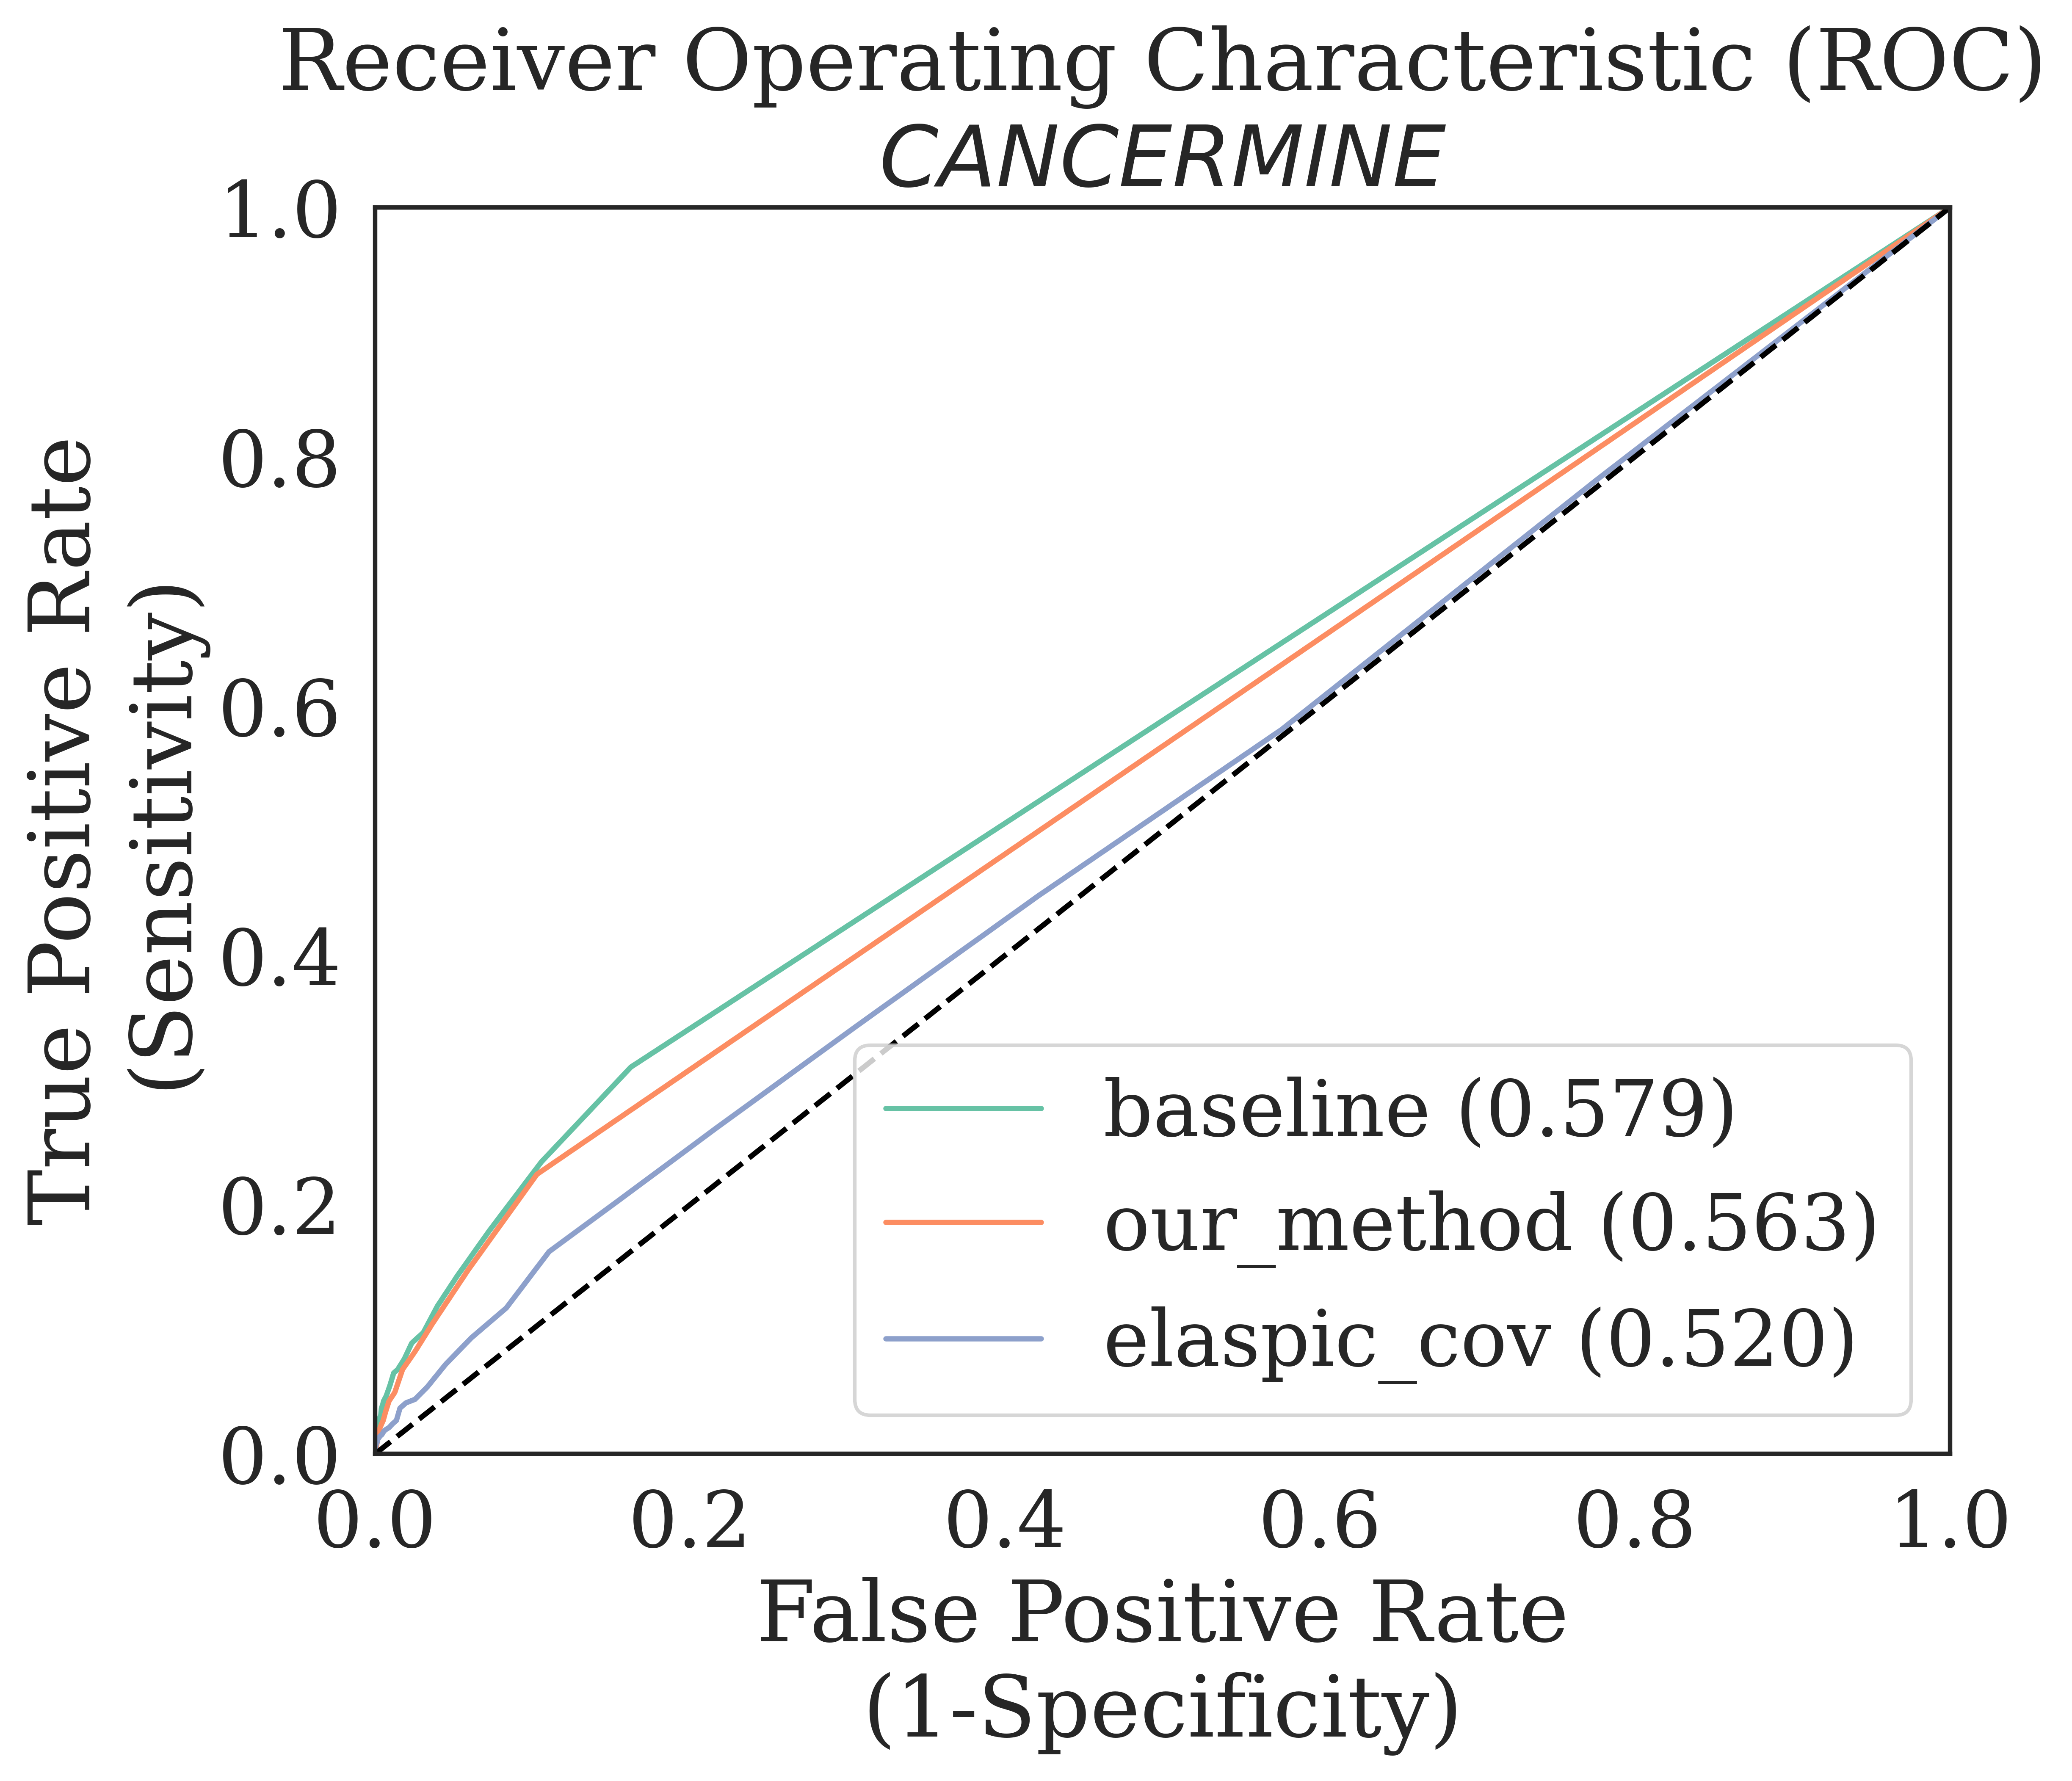

2022-02-16 12:38:34 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.579
2022-02-16 12:38:34 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.563
2022-02-16 12:38:34 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.520


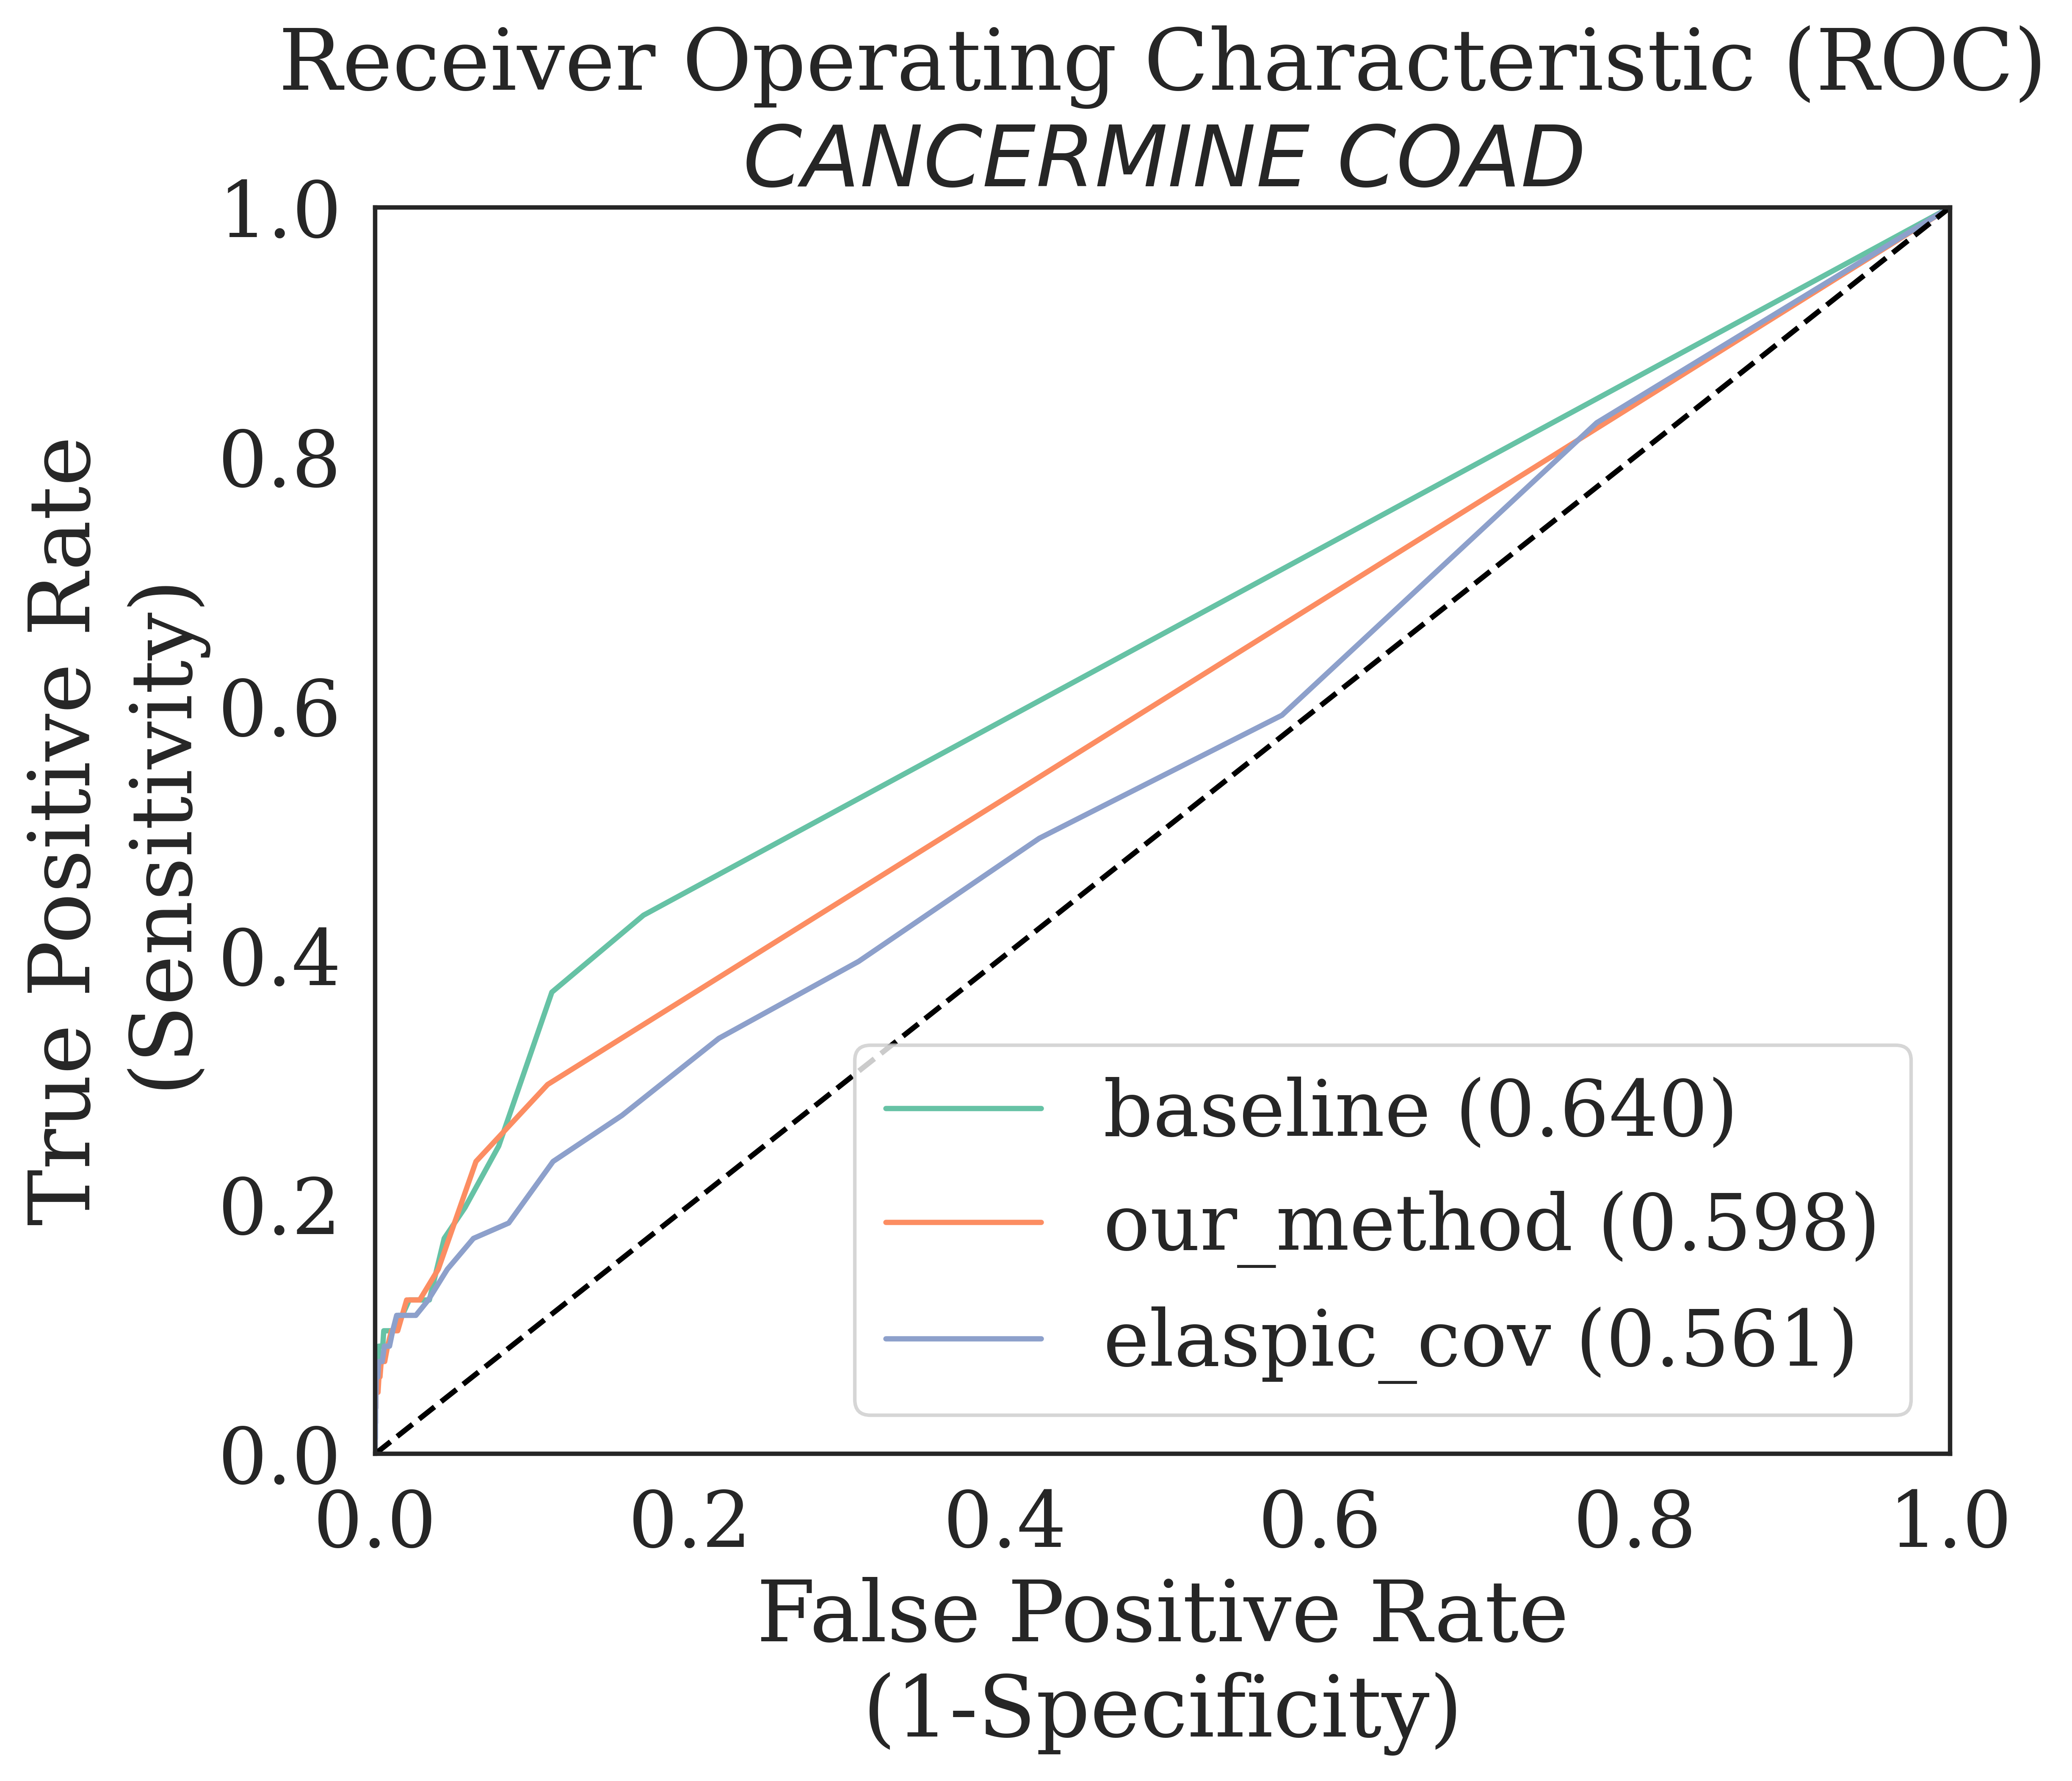

2022-02-16 12:38:36 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.640
2022-02-16 12:38:36 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.598
2022-02-16 12:38:36 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.561


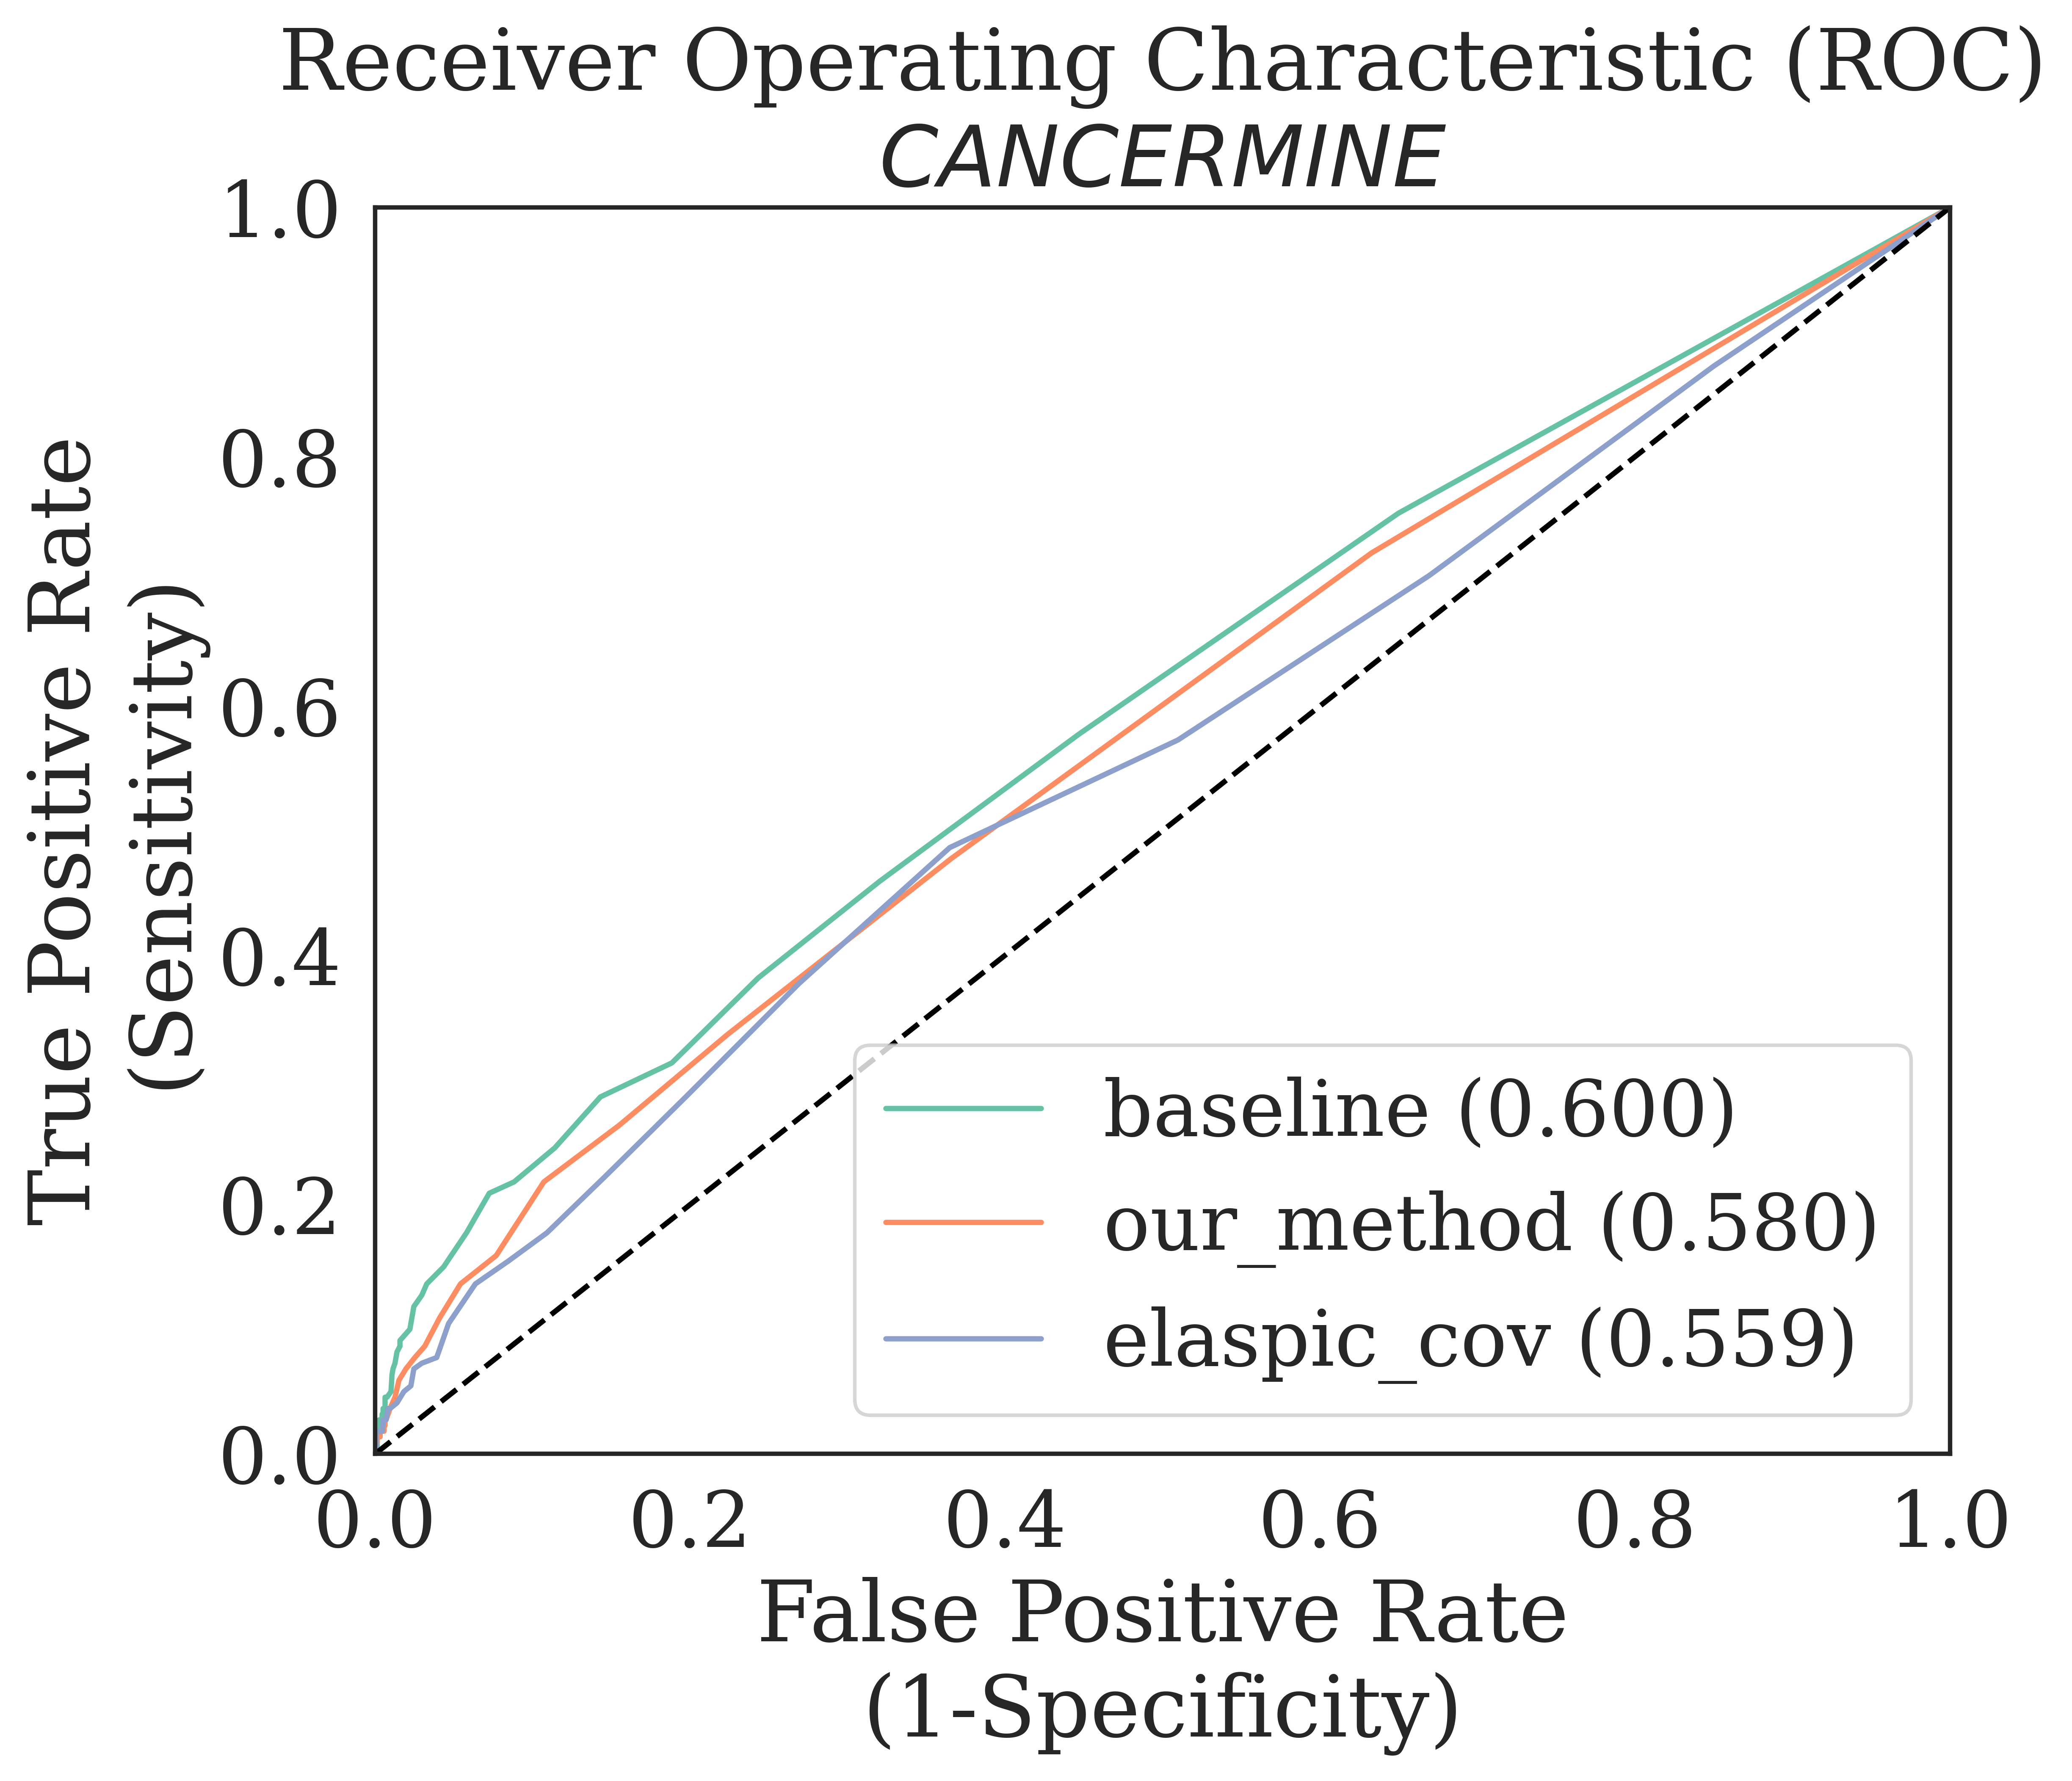

2022-02-16 12:38:38 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.600
2022-02-16 12:38:38 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.580
2022-02-16 12:38:38 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.559


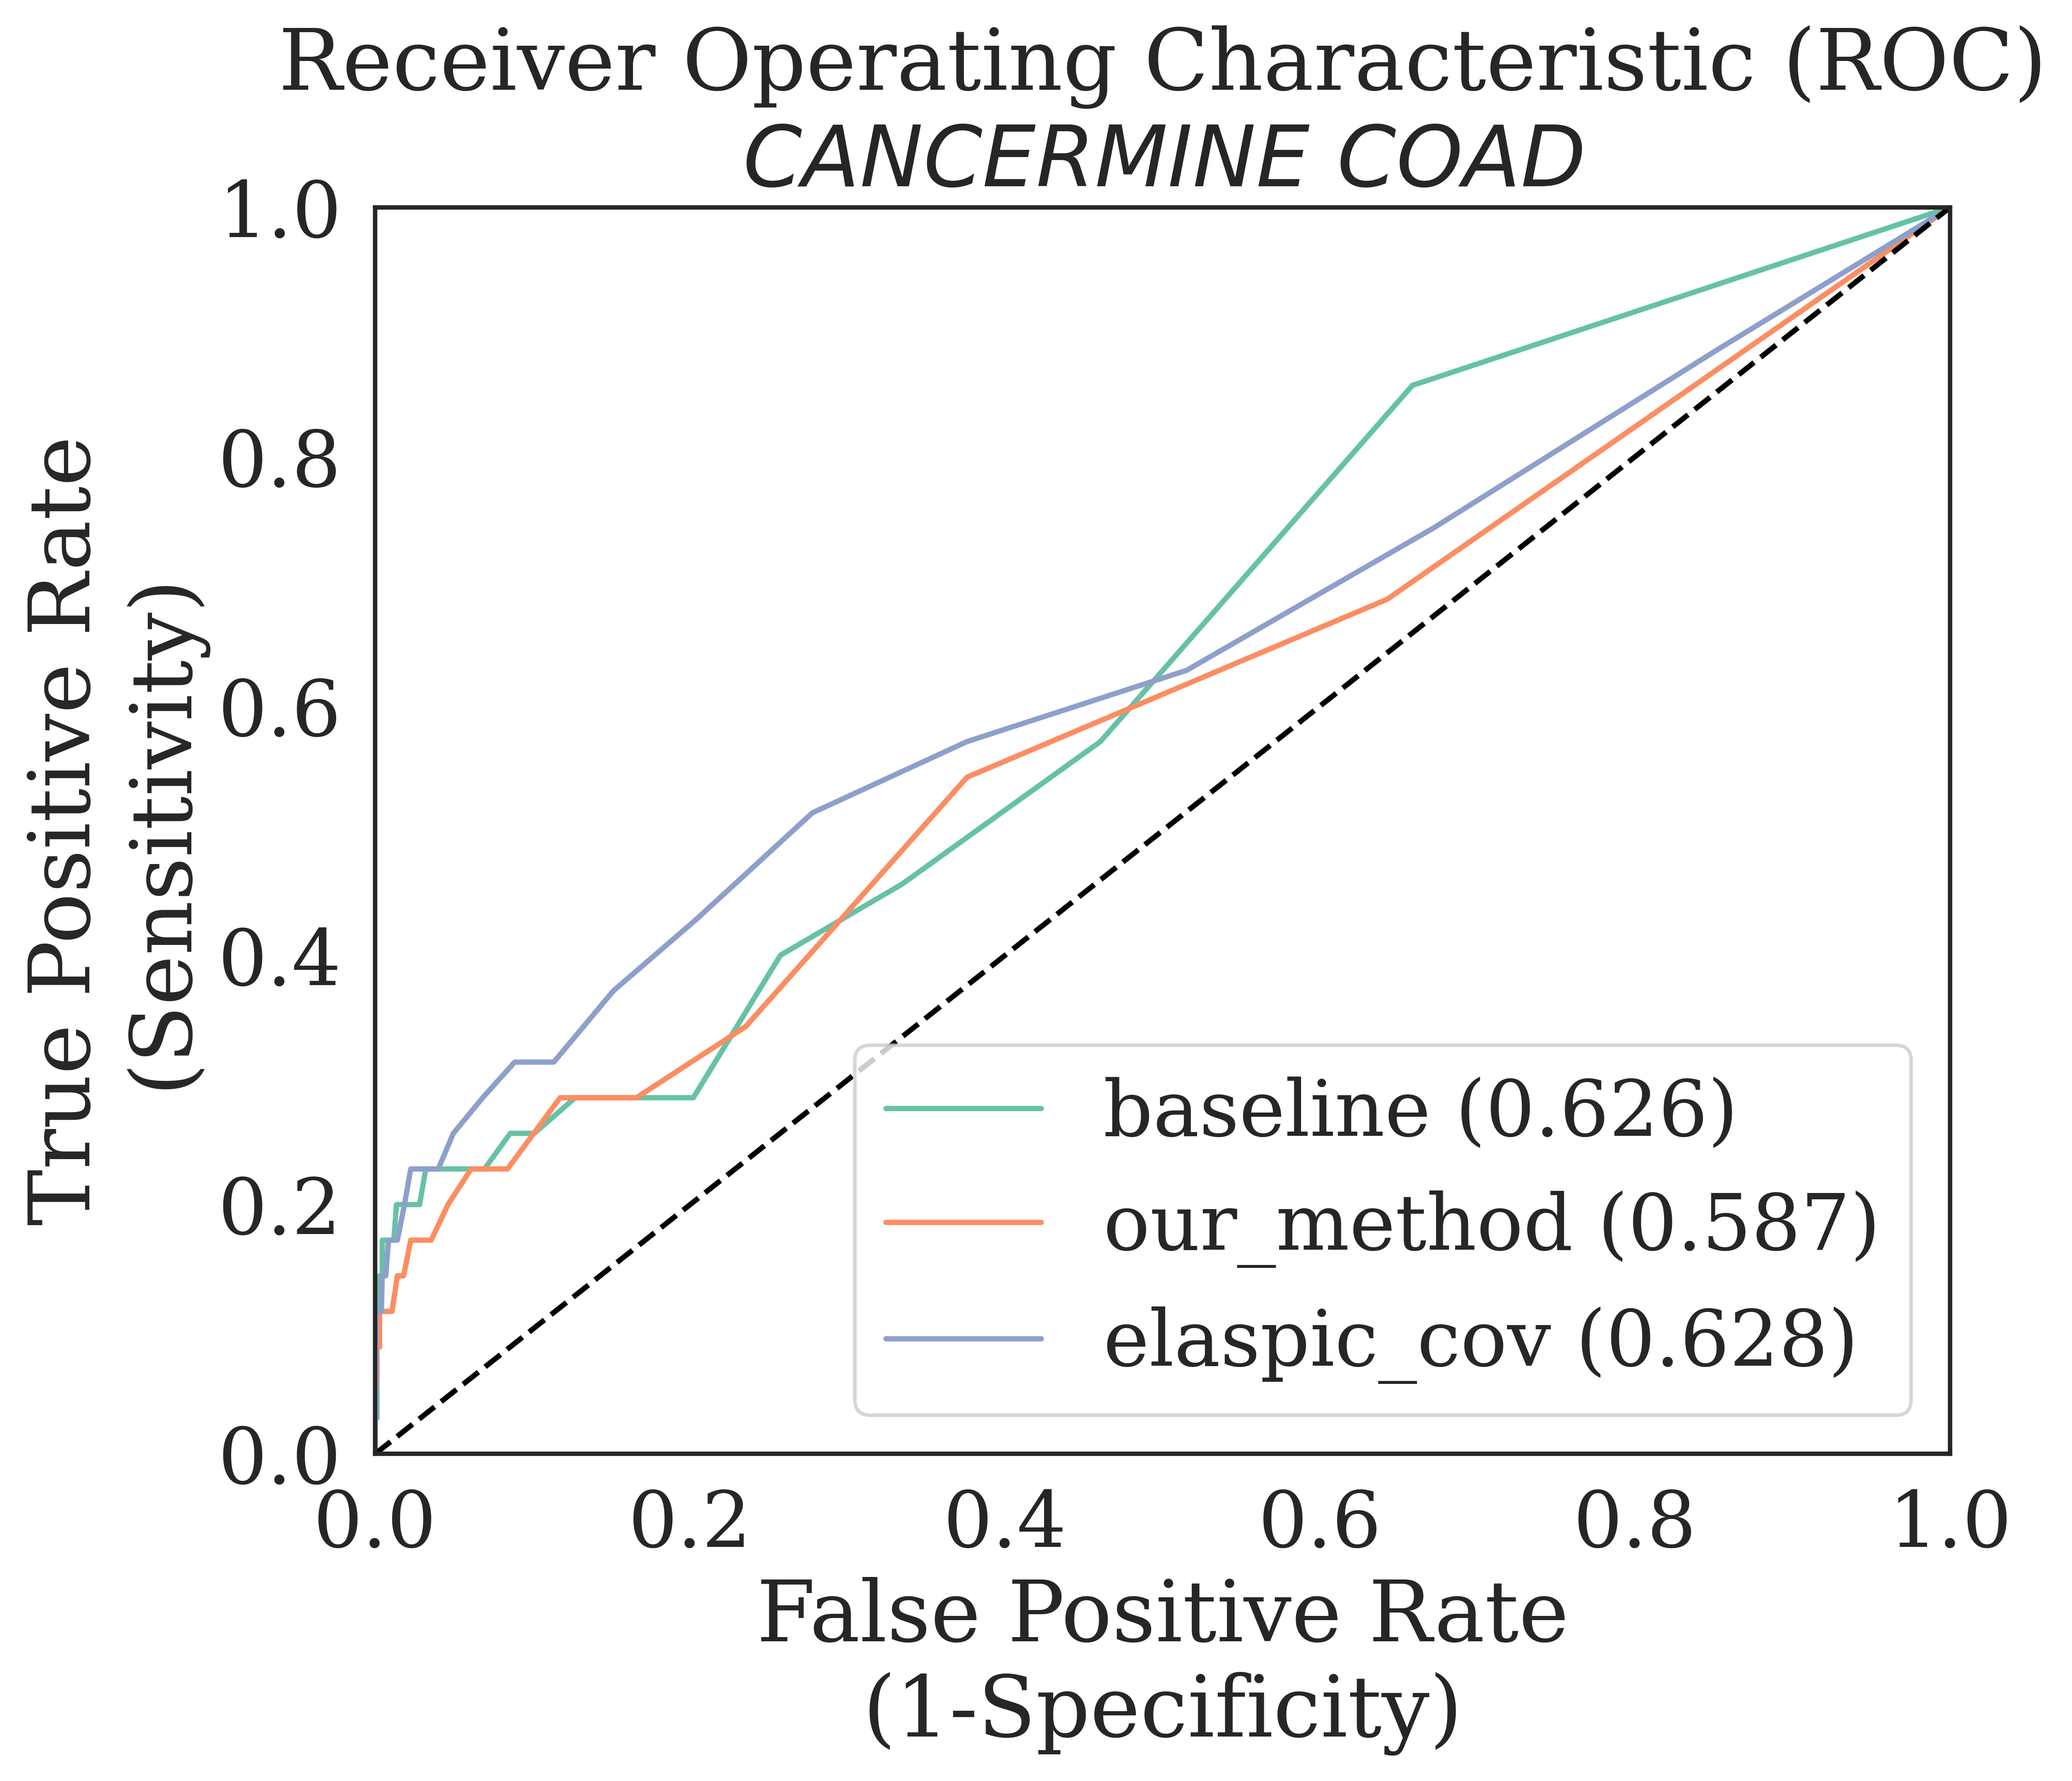

2022-02-16 12:38:40 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC BASELINE: 0.626
2022-02-16 12:38:40 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC OURS: 0.587
2022-02-16 12:38:40 | DEBUG    | helpers.helpers_analysis.plot_roc_curve | AUC ELASPIC COVERAGE: 0.628


In [25]:
predator_analysis.run_roc_curve_analysis(
    preliminary_data_name="coad_preliminary_data",
    state_variables=["CancerMine_STATUS", "CancerMine_STATUS (COAD)"]
)

In [26]:
predator_analysis.export_auc_scores("auc_scores_cancermine", overwrite=False)

default default_coad baseline_nonzero baseline_nonzero_coad
Method                                                                 
BASELINE      0.579        0.640            0.600                 0.626
OURS          0.563        0.598            0.580                 0.587
ELASPIC_COV   0.520        0.561            0.559                 0.628

2022-02-16 12:38:53 | INFO     | helpers.helpers_analysis.common | AUC scores are saved into file ..\data\predictions_datasets\coad_prediction_2022-01-06\9789393f\auc_scores_cancermine_2022-02-16.csv


# Save Preliminary data to Excel file

In [27]:
from helpers.helpers_analysis.common import save_to_excel

In [28]:
save_to_excel(
    prediction_file_path=predator_analysis.prediction_data_path,
    preliminary_data=predator_analysis.data_materials["coad_preliminary_data"],
    file_name="coad_preliminary_data_cancermine",
    export_flag=True, 
)

2022-02-16 12:39:03 | DEBUG    | helpers.helpers_analysis.common | ..\data\predictions_datasets\coad_prediction_2022-01-06\9789393f\coad_preliminary_data_cancermine_2022-02-16.xlsx is exported.
2022-02-16 12:39:03 | DEBUG    | helpers.helpers_analysis.common | descriptions_..\data\predictions_datasets\coad_prediction_2022-01-06\9789393f\coad_preliminary_data_cancermine_2022-02-16_descriptions.xlsx is exported.


---

In [29]:
# done